<a href="https://colab.research.google.com/github/Thiago89ml/Challenge-de-Veracidad/blob/main/Challenge_Predicci%C3%B3n_de_veracidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
df = pd.read_csv('df_train (1).csv')

In [157]:
df.head()

,ID,Etiqueta,Declaracion,Tema,Orador,Cargo del Orador,Estado,Afiliación Politica,Cantidad Verdadera,Cantidad Falsa,Contexto
0,11173,True,The Fourth Amendment was what we fought the Re...,"history,legal-issues,privacy",rand-paul,Candidate for U.S. Senate and physician,Kentucky,republican,12,18,a Republican presidential debate in Cleveland
1,1687,False,"When the United States ""first created the fede...","history,taxes",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican,10,42,a speech to the Southern Republican Leadership...
2,3322,False,Wisconsin Gov. Scott Walkers estimate of a $3....,"labor,state-budget",mark-pocan,"State Assembly member, 78th District",Wisconsin,democrat,3,3,a blog posting
3,8225,False,A proposed San Antonio ordinance will allow me...,"city-government,legal-issues",texas-values,NaN,NaN,none,0,2,an email blast
4,2516,False,Says Wisconsin Attorney General J.B. Van Holle...,"crime,legal-issues",scott-hassett,Candidate for state Attorney General,Wisconsin,democrat,0,1,an email to supporters


In [158]:
df.shape

(3127, 11)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127 entries, 0 to 3126
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   3127 non-null   int64 
 1   Etiqueta             3127 non-null   bool  
 2   Declaracion          3127 non-null   object
 3   Tema                 3127 non-null   object
 4   Orador               3127 non-null   object
 5   Cargo del Orador     2208 non-null   object
 6   Estado               2423 non-null   object
 7   Afiliación Politica  3127 non-null   object
 8   Cantidad Verdadera   3127 non-null   int64 
 9   Cantidad Falsa       3127 non-null   int64 
 10  Contexto             3093 non-null   object
dtypes: bool(1), int64(3), object(7)
memory usage: 247.5+ KB


In [160]:
df.isnull().sum()

,0
ID,0
Etiqueta,0
Declaracion,0
Tema,0
Orador,0
Cargo del Orador,919
Estado,704
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0


In [161]:
df.drop(columns='Cargo del Orador', inplace = True)
df.isnull().sum()

,0
ID,0
Etiqueta,0
Declaracion,0
Tema,0
Orador,0
Estado,704
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0
Contexto,34


In [162]:
df.drop(columns='Estado', inplace = True)
df.isnull().sum()

,0
ID,0
Etiqueta,0
Declaracion,0
Tema,0
Orador,0
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0
Contexto,34


In [163]:
df.drop(columns='Contexto',inplace = True)
df.isnull().sum()

,0
ID,0
Etiqueta,0
Declaracion,0
Tema,0
Orador,0
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127 entries, 0 to 3126
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   3127 non-null   int64 
 1   Etiqueta             3127 non-null   bool  
 2   Declaracion          3127 non-null   object
 3   Tema                 3127 non-null   object
 4   Orador               3127 non-null   object
 5   Afiliación Politica  3127 non-null   object
 6   Cantidad Verdadera   3127 non-null   int64 
 7   Cantidad Falsa       3127 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 174.2+ KB


In [165]:
df['Afiliación Politica'] = df['Afiliación Politica'].map({'democrat': 1,'republican':2,'jornalist':3,'none': 4}).fillna(0)
df.head(25)

,ID,Etiqueta,Declaracion,Tema,Orador,Afiliación Politica,Cantidad Verdadera,Cantidad Falsa
0,11173,True,The Fourth Amendment was what we fought the Re...,"history,legal-issues,privacy",rand-paul,2.0,12,18
1,1687,False,"When the United States ""first created the fede...","history,taxes",newt-gingrich,2.0,10,42
2,3322,False,Wisconsin Gov. Scott Walkers estimate of a $3....,"labor,state-budget",mark-pocan,1.0,3,3
3,8225,False,A proposed San Antonio ordinance will allow me...,"city-government,legal-issues",texas-values,4.0,0,2
4,2516,False,Says Wisconsin Attorney General J.B. Van Holle...,"crime,legal-issues",scott-hassett,1.0,0,1
5,7514,False,The fiscal cliff agreement was the largest tax...,"federal-budget,health-care,taxes",paul-ryan,2.0,14,27
6,10501,True,"In the past year, DeKalb has attracted and ret...","economy,jobs",lee-may,1.0,2,0
7,9385,True,Rick Perry doesnt think there should be a fede...,"economy,federal-budget,state-budget",democratic-national-committee,4.0,8,10
8,610,False,On using the Strategic Petroleum Reserve.,energy,barack-obama,1.0,163,150
9,10831,True,We have a legal immigration system in America ...,immigration,marco-rubio,2.0,35,62


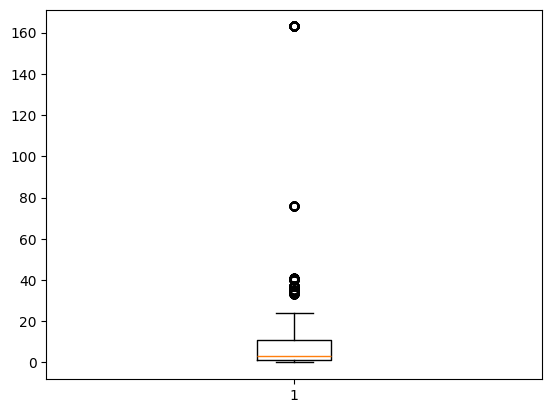

In [166]:
import matplotlib.pyplot as plt
plt.boxplot(df['Cantidad Verdadera'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7acbe433a8a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7acbe433a2a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acbe433a390>],
 'medians': [<matplotlib.lines.Line2D at 0x7acbe433a1e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acbe433bd70>],
 'means': []}

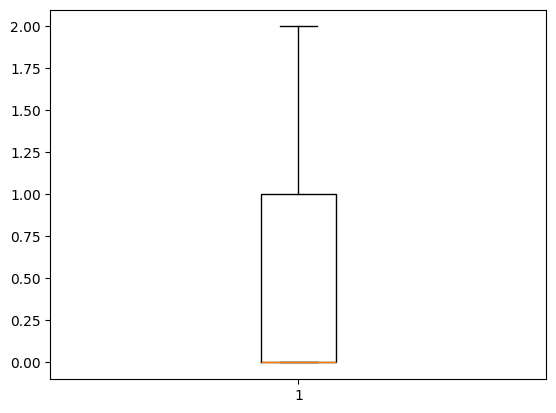

In [167]:
import matplotlib.pyplot as plt
df= df[df['Cantidad Verdadera']< 3]

plt.boxplot(df['Cantidad Verdadera'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7acbe33da540>,
 'caps': [<matplotlib.lines.Line2D at 0x7acbe2a22840>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acbe28a3da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7acbe3377620>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acbe33759a0>],
 'means': []}

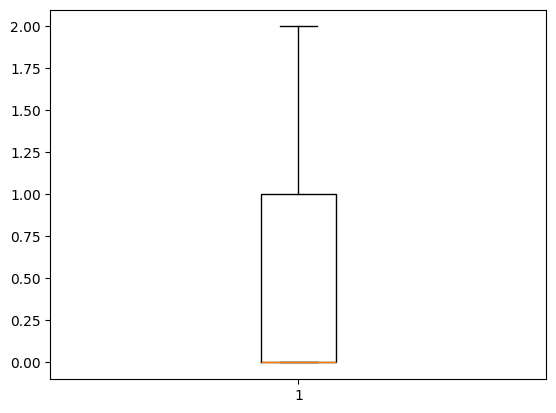

In [168]:
import matplotlib.pyplot as plt
df= df[df['Cantidad Falsa']< 2]

plt.boxplot(df['Cantidad Verdadera'])

In [169]:
características = ['Afiliación Politica','Cantidad Verdadera','Cantidad Falsa']

X = df[características]

y= df['Etiqueta']


In [170]:
from sklearn.model_selection import train_test_split

x_train, X_val, y_train,y_val = train_test_split(X,y,test_size= 0.2)

In [171]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [172]:
from sklearn.preprocessing import StandardScaler

modelo = KNeighborsClassifier(n_neighbors=3)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
modelo.fit(x_train, y_train)



predict = modelo.predict(X_val)
accuracy = accuracy_score(y_val, predict)

print ('Exactitud de la validación: ' , accuracy)

Exactitud de la validación:  0.7167630057803468


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [173]:
df_test = pd.read_csv('df_test_sin_etiqueta (1).csv')
df_test.head()

,ID,Declaracion,Tema,Orador,Cargo del Orador,Estado,Afiliación Politica,Cantidad Verdadera,Cantidad Falsa,Contexto
0,12130,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,NaN,none,1,1,a radio interview
1,6418,Says he never voted for a tax increase.,"debt,deficit,taxes",mark-neumann,Developer and homebuilder,Wisconsin,republican,2,7,campaign website statements
2,191,"""Gov. Romney's own health care plan in Massach...",abortion,fred-thompson,Actor,Tennessee,republican,3,5,an email press release
3,13373,Says drug dealers have overdosed on purpose to...,"crime,drugs,legal-issues",chris-sununu,Executive Councilor,New Hampshire,republican,0,2,a No Labels forum
4,8078,Says the reasoning behind Portlands high water...,"city-government,government-efficiency,water",portlanders-water-reform,NaN,Oregon,none,0,1,a fundraising letter.


In [174]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   782 non-null    int64 
 1   Declaracion          782 non-null    object
 2   Tema                 782 non-null    object
 3   Orador               782 non-null    object
 4   Cargo del Orador     574 non-null    object
 5   Estado               618 non-null    object
 6   Afiliación Politica  782 non-null    object
 7   Cantidad Verdadera   782 non-null    int64 
 8   Cantidad Falsa       782 non-null    int64 
 9   Contexto             771 non-null    object
dtypes: int64(3), object(7)
memory usage: 61.2+ KB


In [175]:
df_test.isnull().sum()

,0
ID,0
Declaracion,0
Tema,0
Orador,0
Cargo del Orador,208
Estado,164
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0
Contexto,11


In [176]:
df_test.drop(columns='Cargo del Orador', inplace= True)
df_test.isnull().sum()

,0
ID,0
Declaracion,0
Tema,0
Orador,0
Estado,164
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0
Contexto,11


In [177]:
df_test.drop(columns='Estado',inplace = True)
df_test.isnull().sum()

,0
ID,0
Declaracion,0
Tema,0
Orador,0
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0
Contexto,11


In [178]:
df_test.drop(columns='Contexto', inplace = True)
df_test.isnull().sum()

,0
ID,0
Declaracion,0
Tema,0
Orador,0
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0


In [179]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   782 non-null    int64 
 1   Declaracion          782 non-null    object
 2   Tema                 782 non-null    object
 3   Orador               782 non-null    object
 4   Afiliación Politica  782 non-null    object
 5   Cantidad Verdadera   782 non-null    int64 
 6   Cantidad Falsa       782 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 42.9+ KB


In [180]:

df_test['Afiliación Politica'] = df_test['Afiliación Politica'].map({'republican' : 1, 'democrat' : 2, 'none' : 3, 'organization' : 4, 'independent' : 5}).fillna(0)
df_test.head()

,ID,Declaracion,Tema,Orador,Afiliación Politica,Cantidad Verdadera,Cantidad Falsa
0,12130,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,3.0,1,1
1,6418,Says he never voted for a tax increase.,"debt,deficit,taxes",mark-neumann,1.0,2,7
2,191,"""Gov. Romney's own health care plan in Massach...",abortion,fred-thompson,1.0,3,5
3,13373,Says drug dealers have overdosed on purpose to...,"crime,drugs,legal-issues",chris-sununu,1.0,0,2
4,8078,Says the reasoning behind Portlands high water...,"city-government,government-efficiency,water",portlanders-water-reform,3.0,0,1


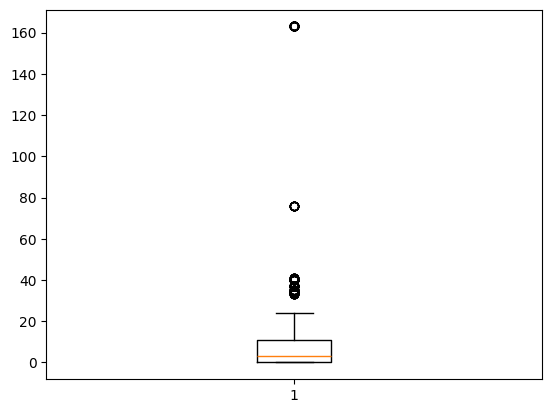

In [181]:
import matplotlib.pyplot as plt
plt.boxplot(df_test['Cantidad Verdadera'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7acbe31a3f80>,
 'caps': [<matplotlib.lines.Line2D at 0x7acbe31a27b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acbe31a21e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7acbe32901d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acbe3290890>],
 'means': []}

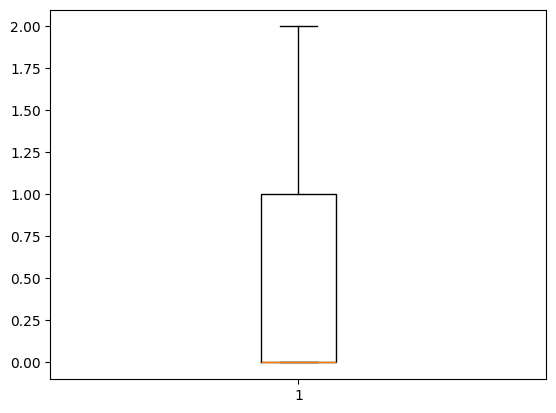

In [182]:
import matplotlib.pyplot as plt
df_test= df_test[df_test['Cantidad Verdadera']< 3]

plt.boxplot(df_test['Cantidad Verdadera'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7acbe3305e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7acbe3304650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7acbe2eb8b60>],
 'medians': [<matplotlib.lines.Line2D at 0x7acbe3304c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7acbe3306d50>],
 'means': []}

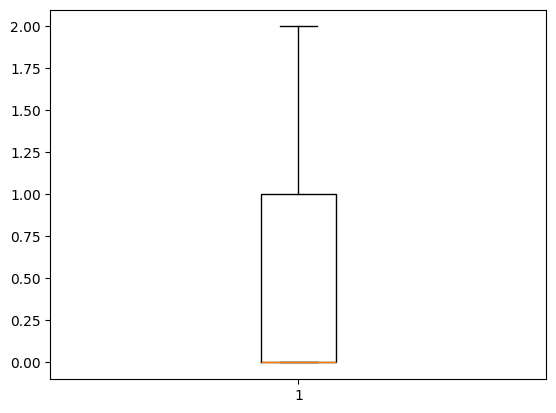

In [183]:
import matplotlib.pyplot as plt
df_test= df_test[df_test['Cantidad Falsa']< 2]

plt.boxplot(df_test['Cantidad Verdadera'])

In [184]:
df_test['Afiliación Politica'] = df_test['Afiliación Politica'].map({'republican' : 1, 'democrat' : 2, 'none' : 3, 'organization' : 4, 'independent' : 5}).fillna(0)
df_test.head()

,ID,Declaracion,Tema,Orador,Afiliación Politica,Cantidad Verdadera,Cantidad Falsa
0,12130,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,0.0,1,1
4,8078,Says the reasoning behind Portlands high water...,"city-government,government-efficiency,water",portlanders-water-reform,0.0,0,1
6,12699,"Illegal tobacco sales, price driven too high, ...","taxes,terrorism",rick-saccone,0.0,1,0
7,5696,"Says under the Affordable Care Act, New Jersey...","health-care,medicaid",amy-handlin,0.0,0,1
15,4257,The Northwest Corridor highway project in Cobb...,jobs,georgia-department-transportation,0.0,0,1


In [185]:
X = df_test[características]
df_test.isnull().sum()
#predictions = modelo.predict(X)



,0
ID,0
Declaracion,0
Tema,0
Orador,0
Afiliación Politica,0
Cantidad Verdadera,0
Cantidad Falsa,0


In [186]:
X_data_val = df_test[características]
X_data_val = scaler.transform(X_data_val)

predict = modelo.predict(X_data_val)

output = pd.DataFrame({'Id' : df_test['ID'], 'Etiqueta': predict})
output.to_csv('submission3.csv', index=False)